#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
#rows
print('NO. rows is', df.shape[0])
#columns
print('NO. columns is',df.shape[1])

NO. rows is 148654
NO. columns is 13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
df.drop(['Notes','Status'], axis=1, inplace=True)

In [5]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [6]:
#descriptive analysis
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [7]:
#standard deviation
df['TotalPay'].std()

50517.005273949944

In [8]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [9]:
df[df['TotalPay']<0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco


In [10]:
# ther are an outlier so we will fill the missings with median not mean
df['BasePay'].fillna(value=df['BasePay'].median() , inplace=True)
df['OvertimePay'].fillna(value=df['OvertimePay'].median() , inplace=True)
df['OtherPay'].fillna(value=df['OtherPay'].median() , inplace=True)
df['Benefits'].fillna(value=df['Benefits'].median() , inplace=True)



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


In [12]:
df['JobTitle'].value_counts()

JobTitle
Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: count, Length: 2159, dtype: int64

In [13]:
titels=df['JobTitle'].unique().tolist()


In [14]:
counts=df['JobTitle'].value_counts().tolist()

In [15]:
dict_jobs={'titel': titels , 'counts': counts}
df_1=pd.DataFrame(data=dict_jobs)
df_1

,titel,counts
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,7036
1,CAPTAIN III (POLICE DEPARTMENT),4389
2,WIRE ROPE CABLE MAINTENANCE MECHANIC,3736
3,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",2518
4,ASSISTANT DEPUTY CHIEF II,2421
...,...,...
2154,"Sr Cnselor, Juv Hall (SFERS)",1
2155,Forensic Toxicologist Supervis,1
2156,Conversion,1
2157,Cashier 3,1


In [16]:
df['Agency'].value_counts()

Agency
San Francisco    148654
Name: count, dtype: int64

<Axes: xlabel='TotalPay'>

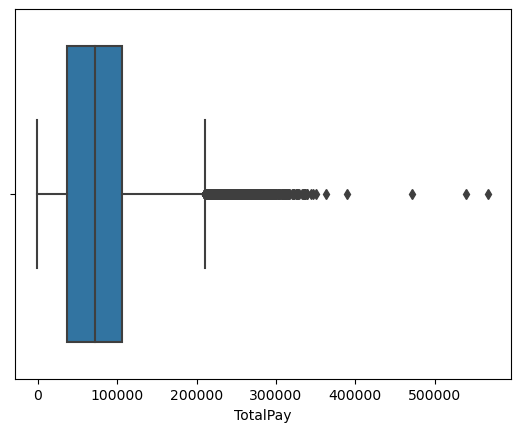

In [17]:
sns.boxplot(data=df ,x='TotalPay' )

<Axes: xlabel='TotalPay', ylabel='Density'>

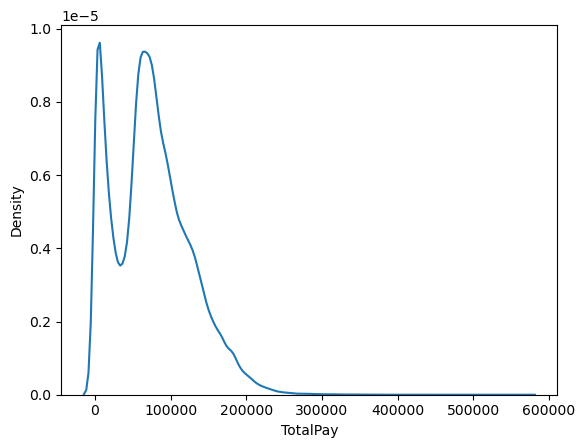

In [18]:
sns.kdeplot(data=df , x='TotalPay')

<Axes: xlabel='Benefits', ylabel='Density'>

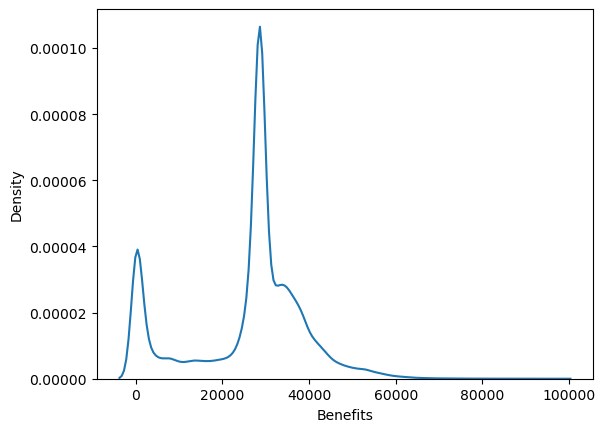

In [19]:
sns.kdeplot(data=df , x='Benefits')

In [20]:
df.select_dtypes(include=np.number)

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,167411.18,0.00,400184.25,28628.62,567595.43,567595.43,2011
1,2,155966.02,245131.88,137811.38,28628.62,538909.28,538909.28,2011
2,3,212739.13,106088.18,16452.60,28628.62,335279.91,335279.91,2011
3,4,77916.00,56120.71,198306.90,28628.62,332343.61,332343.61,2011
4,5,134401.60,9737.00,182234.59,28628.62,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...
148649,148650,0.00,0.00,0.00,0.00,0.00,0.00,2014
148650,148651,65007.45,0.00,811.27,28628.62,0.00,0.00,2014
148651,148652,65007.45,0.00,811.27,28628.62,0.00,0.00,2014
148652,148653,65007.45,0.00,811.27,28628.62,0.00,0.00,2014


In [21]:
df.select_dtypes(include=np.number).corr()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.204724,-0.081523,-0.100415,-0.313756,-0.211478,-0.092190,0.968171
BasePay,-0.204724,1.000000,0.266688,0.283747,0.797311,0.950689,0.943166,0.033682
OvertimePay,-0.081523,0.266688,1.000000,0.316594,0.263699,0.504860,0.467984,0.027870
OtherPay,-0.100415,0.283747,0.316594,1.000000,0.202007,0.470495,0.422341,-0.002511
Benefits,-0.313756,0.797311,0.263699,0.202007,1.000000,0.773559,0.814595,-0.116167
TotalPay,-0.211478,0.950689,0.504860,0.470495,0.773559,1.000000,0.977313,0.032090
TotalPayBenefits,-0.092190,0.943166,0.467984,0.422341,0.814595,0.977313,1.000000,0.151947
Year,0.968171,0.033682,0.027870,-0.002511,-0.116167,0.032090,0.151947,1.000000


<Axes: >

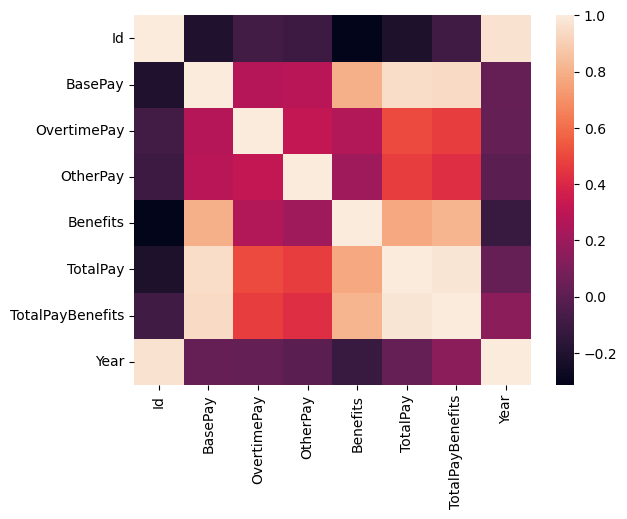

In [22]:
sns.heatmap(df.select_dtypes(include=np.number).corr())

<Axes: xlabel='BasePay', ylabel='TotalPay'>

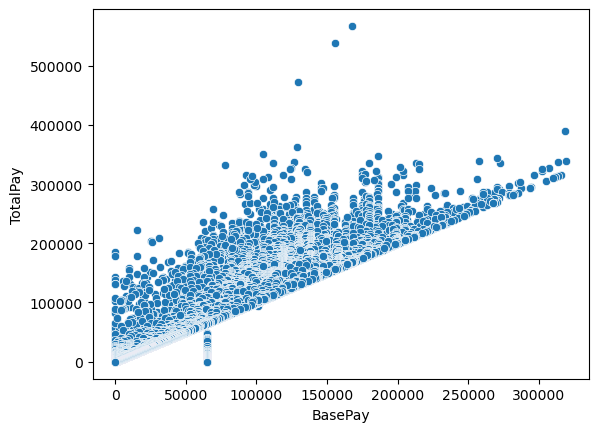

In [23]:
sns.scatterplot(data=df , x='BasePay', y='TotalPay')

<Axes: xlabel='Benefits', ylabel='TotalPay'>

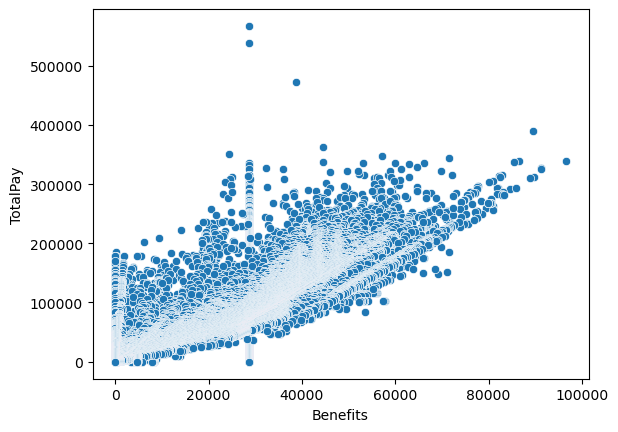

In [24]:
sns.scatterplot(data=df , x='Benefits', y='TotalPay')

<Axes: xlabel='OvertimePay', ylabel='TotalPay'>

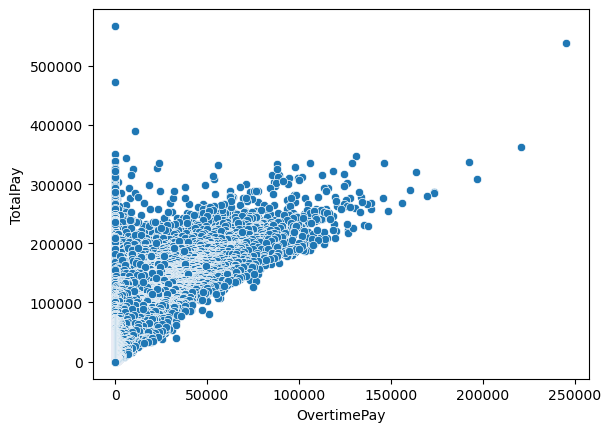

In [25]:
sns.scatterplot(data=df , x='OvertimePay', y='TotalPay')

<Axes: xlabel='BasePay', ylabel='OvertimePay'>

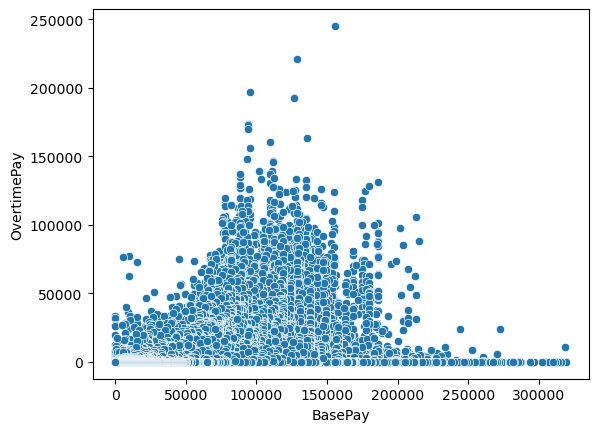

In [26]:
sns.scatterplot(data=df , y='OvertimePay', x='BasePay')

# Good Luck!